In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

# Analysing data

In [4]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train.describe()
# missing values for age column
# passenger ages between 0.42 and 80
# most passengers have ages between 20 and 38

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test.describe()
# values maintain relatively constant

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
train.info()
# cabin information is missing from a significant amount of passengers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train.Cabin.value_counts()
# will drop this column as it is very complex, specific and is missing a lot of values

G6                 4
B96 B98            4
C23 C25 C27        4
F2                 3
C22 C26            3
F33                3
D                  3
E101               3
C78                2
C65                2
C83                2
D35                2
C93                2
B28                2
E8                 2
E33                2
D26                2
C124               2
B35                2
E44                2
C92                2
E121               2
C125               2
B57 B59 B63 B66    2
C52                2
B5                 2
C123               2
B51 B53 B55        2
C68                2
F G73              2
                  ..
B71                1
C46                1
C110               1
C50                1
C85                1
E58                1
B102               1
B73                1
C91                1
C62 C64            1
A16                1
F E69              1
C128               1
D50                1
E10                1
B50                1
B38          

In [10]:
# dropping the Cabin column
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

In [11]:
train[['Survived','Pclass']].groupby('Pclass').mean()
# passengers from 1st class had the highest survival rate

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [12]:
train[['Survived','Sex']].groupby('Sex').mean()
# females had a higher survival rate

,Survived
Sex,
female,0.742038
male,0.188908


In [13]:
train[['Survived','Embarked']].groupby('Embarked').mean()
# passengers who embarked from port C had the highest survival rate

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


Assumptions:

- Females and toddlers (< 3) are more likely to have survived.
- Old people are more likely to have survived.
- Wealthier individuals (both males and females) are more likely to have survived - based on class and ticket price.
- People who travelled by themselves are less likely to have survived.
- Males from lower classes are less likely to have survived.
- Poorer passengers are less likely to have survived.

# Visualising

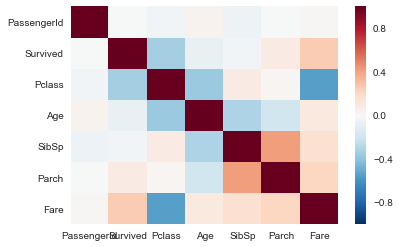

In [14]:
sns.heatmap(train.corr())
# at first glance, there is a bit of correlation between the survival and the fare price
# will come back at this later once data has been organised

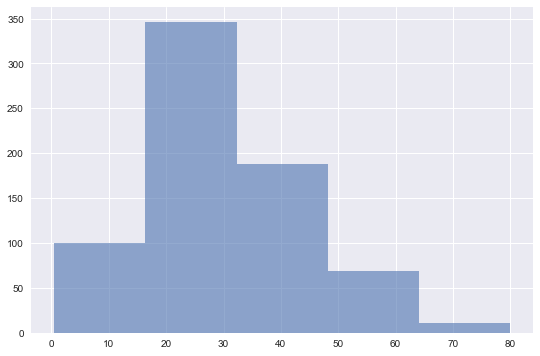

In [15]:
train.Age.hist(figsize=(9,6),bins=5,alpha=0.6)
# as seen from .describe(), most pasengers are between 20 and 40 years old

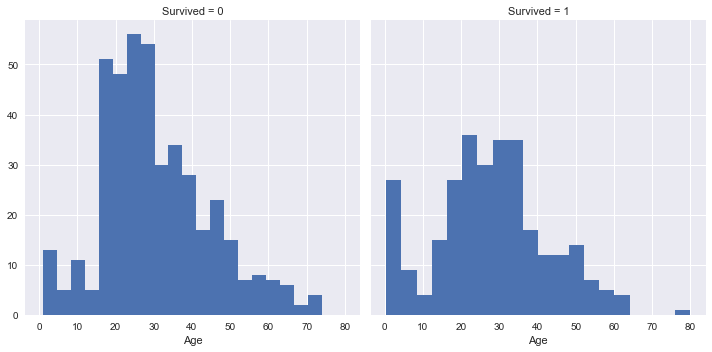

In [16]:
ages = sns.FacetGrid(train, col='Survived',size=5)
ages.map(plt.hist,'Age',bins=20)
# most toddlers survived
# odlest passengers survived

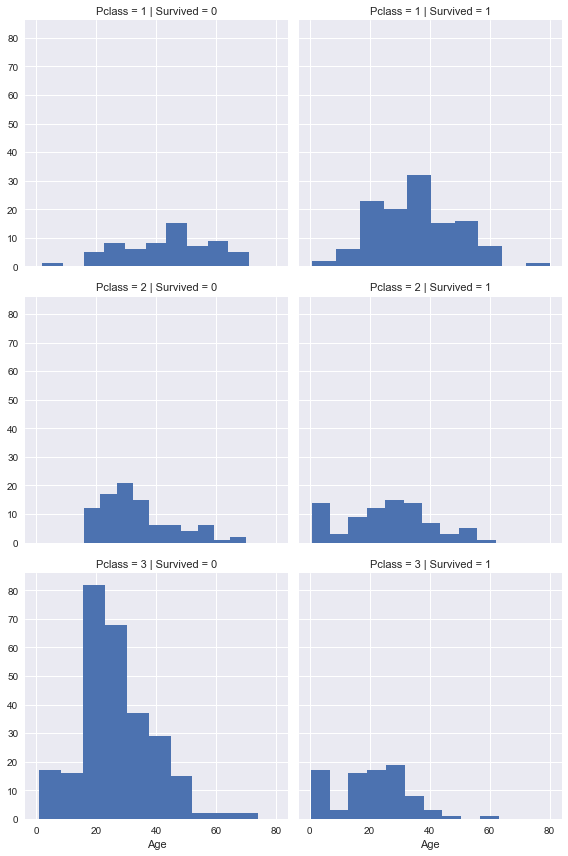

In [17]:
pcl = sns.FacetGrid(train, col='Survived', row='Pclass',size=4)
pcl.map(plt.hist, 'Age')
# despite the overall number of todlers that survived beign among the highest, 
# there were plenty who didn't survive from 1st and 3rd class

# while in the 2nd and 3rd class, the number passengers between 20 and 40 had the highest non-survival rate,
# in the 1st class they are the ones with the highest survival rates

# Wrangling

In [18]:
# starting with names, the column will be dropped
# might return and re-run with the titles split
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

In [19]:
# changing the Sex column to 0 for males and 1 for females
for i in train.index:
    if train.iloc[i]['Sex'] == 'male':
        train.set_value(i,'Sex',0)
    else:
        train.set_value(i,'Sex',1)

In [20]:
for i in test.index:
    if test.iloc[i]['Sex'] == 'male':
        test.set_value(i,'Sex',0)
    else:
        test.set_value(i,'Sex',1)

In [21]:
# sibsp, parch columns will be turned into a single one called family
train['Family'] = train['SibSp'] + train['Parch'] + 1
test['Family'] = test['SibSp'] + test['Parch'] + 1

In [22]:
# changing from family to whether the person is alone or not
for i in train.index:
    if train.iloc[i]['Family'] != 0:
        train.set_value(i,'Family',1)
for i in test.index:
    if test.iloc[i]['Family'] != 0:
        test.set_value(i,'Family',1)

In [23]:
# dropping the sibsp and parch column
train.drop('Parch',axis=1,inplace=True)
train.drop('SibSp',axis=1,inplace=True)
test.drop('Parch',axis=1,inplace=True)
test.drop('SibSp',axis=1,inplace=True)

In [24]:
# ticket column is too complex, dropping it
train.drop('Ticket',axis=1,inplace=True)
test.drop('Ticket',axis=1,inplace=True)

In [25]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,1,0,3,0,22.0,7.2500,S,1
1,2,1,1,1,38.0,71.2833,C,1
2,3,1,3,1,26.0,7.9250,S,1
3,4,1,1,1,35.0,53.1000,S,1
4,5,0,3,0,35.0,8.0500,S,1
5,6,0,3,0,NaN,8.4583,Q,1
6,7,0,1,0,54.0,51.8625,S,1
7,8,0,3,0,2.0,21.0750,S,1
8,9,1,3,1,27.0,11.1333,S,1
9,10,1,2,1,14.0,30.0708,C,1


In [26]:
# changing embarked to numerical values in descending order of survival
# first fill in the gaps
for i in train[train.Embarked.isnull()].index:
    train.set_value(i,'Embarked', 'S')

In [27]:
train['Embarked'] = train['Embarked'].map( {'C': 3, 'Q': 2, 'S': 1} ).astype(int)

In [28]:
test['Embarked'] = test['Embarked'].map( {'C': 3, 'Q': 2, 'S': 1} ).astype(int)

In [29]:
# going back to age, will be converting them from continous to discrete
# <3 - 1
# 3-18 - 2
# 18-31 - 3
# 31-48 - 4
# 48-63 - 5
# 63< - 6

for i in train.index:
    x = train.iloc[i]['Age']
    if x <= 3 or np.isnan(x):
        train.set_value(i,'Age',1)
    elif x > 3 and x <=18:
        train.set_value(i,'Age',2)
    elif x > 18 and x <= 31:
        train.set_value(i,'Age',3)
    elif x > 31 and x <= 48:
        train.set_value(i,'Age',4)
    elif x > 48 and x <= 63:
        train.set_value(i,'Age',5)
    elif x > 63:
        train.set_value(i,'Age',6)

In [30]:
for i in test.index:
    x = test.iloc[i]['Age']
    if x <= 3 or np.isnan(x):
        test.set_value(i,'Age',1)
    elif x > 3 and x <=18:
        test.set_value(i,'Age',2)
    elif x > 18 and x <= 31:
        test.set_value(i,'Age',3)
    elif x > 31 and x <= 48:
        test.set_value(i,'Age',4)
    elif x > 48 and x <= 63:
        test.set_value(i,'Age',5)
    elif x > 63:
        test.set_value(i,'Age',6)

In [31]:
# there is one missing value in the test set for fare, will replace it with the mean of all entries for that column
# index = 152
test[test.Fare.isnull()]

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family
152,1044,3,0,5.0,NaN,1,1


In [32]:
st = train.Fare.sum()
stt = test[~test.Fare.isnull()]['Fare'].sum()

In [33]:
ln = len(train.Fare) + len(test[~test.Fare.isnull()])

In [34]:
test.set_value(152,'Fare',(st + stt)/ln)
test.iloc[152]

PassengerId       1044
Pclass               3
Sex                  0
Age                  5
Fare           33.2955
Embarked             1
Family               1
Name: 152, dtype: object

In [35]:
# drop passengerids
train.drop('PassengerId',axis=1,inplace=True)
test.drop('PassengerId',axis=1,inplace=True)

In [36]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,0,3.0,7.2500,1,1
1,1,1,1,4.0,71.2833,3,1
2,1,3,1,3.0,7.9250,1,1
3,1,1,1,4.0,53.1000,1,1
4,0,3,0,4.0,8.0500,1,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5EE6235F8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001E5F078D9E8>]], dtype=object)

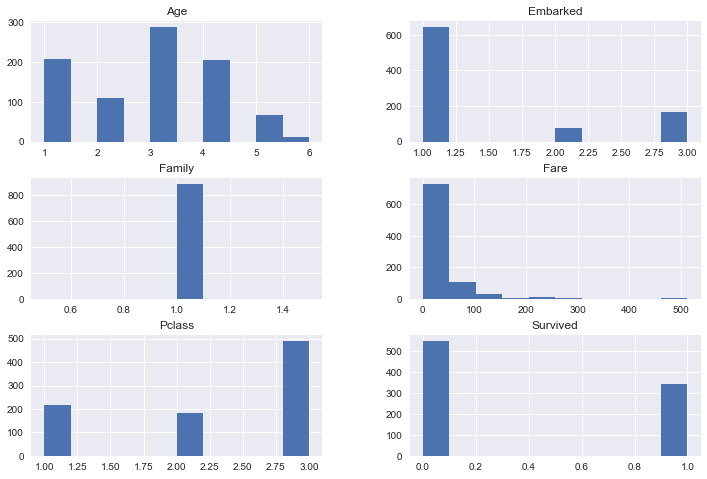

In [37]:
# one more visualisation before going to predictions
train.hist(figsize=(12,8))

In [38]:
# splitting into independent and dependent variables
X = train.iloc[:,1:].values
y = train.iloc[:,0].values

In [39]:
# encoding dummy variables
from sklearn.preprocessing import OneHotEncoder
# turning the Pclass and Embarked columns into dummy variable columns
hot_e = OneHotEncoder(categorical_features = [4])
X = hot_e.fit_transform(X).toarray()
X = X[:, 1:]
hot_e = OneHotEncoder(categorical_features = [2])
X = hot_e.fit_transform(X).toarray()
X = X[:, 1:]

In [40]:
# same as above for the test set
test = test.iloc[:,:].values
# turning the Pclass and Embarked columns into dummy variable columns
hot_e = OneHotEncoder(categorical_features = [4])
test = hot_e.fit_transform(test).toarray()
test = test[:, 1:]
hot_e = OneHotEncoder(categorical_features = [2])
test = hot_e.fit_transform(test).toarray()
test = test[:, 1:]

In [41]:
# eliminating columns for p stat score greater than 0.05
import statsmodels.formula.api as sm

In [42]:
# adding the intercept for the formula
X = np.append(values=X, arr=np.ones((891,1)).astype(int),axis=1)

In [43]:
X_opt = X[:, [0,1,2,3,4,5,6,7,8]]

# ordinary least squares regressor
regressor_OLS = sm.OLS(y,X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     76.18
Date:                Thu, 11 May 2017   Prob (F-statistic):           2.79e-86
Time:                        18:53:27   Log-Likelihood:                -411.47
No. Observations:                 891   AIC:                             838.9
Df Residuals:                     883   BIC:                             877.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.2207      0.028      7.762      0.000         0.165     0.277
x1            -0.1170      0.045     -2.606      0.009        -0.205    -0.029
x2            -0.3121      0.041     -7.537      0.000        -0.393    -0.231
x3             0.0477      0.049      0.976      0.329        -0.048     0.144
x4             0.0808      0.035      2.283      0.023         0.011     0.150
x5             0.5023      0.028     18.010      0.000         0.448     0.557
x6            -0.0224      0.011     -2.059      0.040        -0.044    -0.001
x7             0.0002      0.000      0.531      0.596        -0.000     0.001
x8             0.2207      0.028      7.762      0.000         0.165     0.277
==============================================================================
Omnibus:                       41.150   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.908
Skew:                           0.554   Prob(JB):                     1.07e-10
Kurtosis:                       3.094   Cond. No.                     1.98e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.95e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [44]:
X_opt = X[:, [0,1,2,3,4,5,6,8]]
regressor_OLS = sm.OLS(y,X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     88.91
Date:                Thu, 11 May 2017   Prob (F-statistic):           3.26e-87
Time:                        18:53:27   Log-Likelihood:                -411.62
No. Observations:                 891   AIC:                             837.2
Df Residuals:                     884   BIC:                             870.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.2275      0.025      8.954      0.000         0.178     0.277
x1            -0.1274      0.040     -3.163      0.002        -0.207    -0.048
x2            -0.3236      0.035     -9.193      0.000        -0.393    -0.255
x3             0.0470      0.049      0.963      0.336        -0.049     0.143
x4             0.0829      0.035      2.357      0.019         0.014     0.152
x5             0.5044      0.028     18.282      0.000         0.450     0.559
x6            -0.0225      0.011     -2.075      0.038        -0.044    -0.001
x7             0.2275      0.025      8.954      0.000         0.178     0.277
==============================================================================
Omnibus:                       40.820   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.484
Skew:                           0.551   Prob(JB):                     1.33e-10
Kurtosis:                       3.096   Cond. No.                     1.15e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.95e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [45]:
X_opt = X[:, [0,1,2,4,5,6,8]]
regressor_OLS = sm.OLS(y,X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     106.5
Date:                Thu, 11 May 2017   Prob (F-statistic):           4.75e-88
Time:                        18:53:27   Log-Likelihood:                -412.08
No. Observations:                 891   AIC:                             836.2
Df Residuals:                     885   BIC:                             864.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.2314      0.025      9.224      0.000         0.182     0.281
x1            -0.1290      0.040     -3.206      0.001        -0.208    -0.050
x2            -0.3200      0.035     -9.143      0.000        -0.389    -0.251
x3             0.0780      0.035      2.242      0.025         0.010     0.146
x4             0.5073      0.027     18.490      0.000         0.453     0.561
x5            -0.0245      0.011     -2.292      0.022        -0.045    -0.004
x6             0.2314      0.025      9.224      0.000         0.182     0.281
==============================================================================
Omnibus:                       39.593   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.979
Skew:                           0.543   Prob(JB):                     2.82e-10
Kurtosis:                       3.082   Cond. No.                     1.15e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.95e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [46]:
# eliminating the column of ones
X_opt = X_opt[:, 1:]

In [47]:
# evening out the columns for test set
test = test[:, [0,1,3,4,5,7]]

# Predictions

More changes to come!

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_opt, y, test_size=0.33, random_state=42)

In [49]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

In [50]:
cls = RandomForestClassifier()

In [51]:
cls.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [52]:
cls.score(X_test,y_test)

0.75593220338983047

In [53]:
cls.score(X_train,y_train)

0.8087248322147651

In [54]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

In [55]:
lg = LogisticRegression()

In [56]:
lg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
lg.score(X_test,y_test)

0.78983050847457625

In [58]:
lg.score(X_train,y_train)

0.77684563758389258

In [59]:
# SVC

In [60]:
from sklearn.svm import SVC

In [61]:
svc = SVC()

In [62]:
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [63]:
svc.score(X_test,y_test)

0.79661016949152541

In [64]:
svc.score(X_train,y_train)

0.78187919463087252

In [65]:
# Gradient Boosting - best so far on Kaggle

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
gb = GradientBoostingClassifier()

In [68]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [69]:
gb.score(X_test,y_test)

0.7830508474576271

In [70]:
gb.score(X_train,y_train)

0.81040268456375841

In [71]:
# Decision trees - same score as Gradient Boosting on Kaggle

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
tr = DecisionTreeClassifier()

In [74]:
tr.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [75]:
tr.score(X_test,y_test)

0.74576271186440679

In [76]:
tr.score(X_train,y_train)

0.81040268456375841

In [77]:
# KNN Classifier

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
kn = KNeighborsClassifier(weights='distance')

In [80]:
kn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [81]:
kn.score(X_test,y_test)

0.76271186440677963

In [82]:
kn.score(X_train,y_train)

0.79026845637583898

In [83]:
# GaussianNB

In [84]:
from sklearn.naive_bayes import GaussianNB

In [85]:
nb = GaussianNB()

In [86]:
nb.fit(X_train, y_train)

GaussianNB(priors=None)

In [87]:
nb.score(X_test,y_test)

0.7593220338983051

In [88]:
nb.score(X_train,y_train)

0.77684563758389258

In [89]:
# Gaussian PRocess Classifier

In [90]:
from sklearn.gaussian_process import GaussianProcessClassifier

In [91]:
gpc = GaussianProcessClassifier()

In [92]:
gpc.fit(X_train,y_train)

GaussianProcessClassifier(copy_X_train=True, kernel=None,
             max_iter_predict=100, multi_class='one_vs_rest', n_jobs=1,
             n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
             random_state=None, warm_start=False)

In [93]:
gpc.score(X_test,y_test)

0.77627118644067794

In [94]:
gpc.score(X_train,y_train)

0.80704697986577179

In [95]:
# setting pred equal to a prediction from one of the algorithms

In [96]:
# pred = gb.predict(test)

In [97]:
# # exporting the final result
# import csv
# with open('output.csv','w') as resultFile:
#      wr = csv.writer(resultFile, dialect='excel')
#      wr.writerow(pred)